<a href="https://colab.research.google.com/github/IshaSarangi/Edureka_Notes/blob/main/Edureka_Clustering_Algorithms_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1VQlRzKipxrxa9uduNGPWN6qjjpwpvinh?usp=sharing

##Problem Statement:

Aim is to build the clusters of customers based on characteristics like age, income, spending score.

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Read Data
df = pd.read_csv('/content/shopping_data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
#Find optimal K using Elbow Curve
wcss = [] #Inertia
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


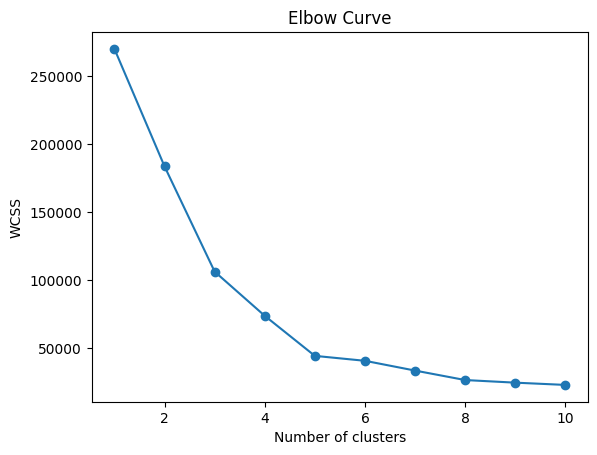

In [ ]:
#Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K-means = 5

In [ ]:
#Build Kmeans with optimal clusters K=5
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(x)

KMeans(n_clusters=5)

In [ ]:
y_pred = kmeans.predict(x)
print(y_pred)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [ ]:
#Silhoutte Score
score = silhouette_score(x, y_pred)
print(score)

0.553931997444648


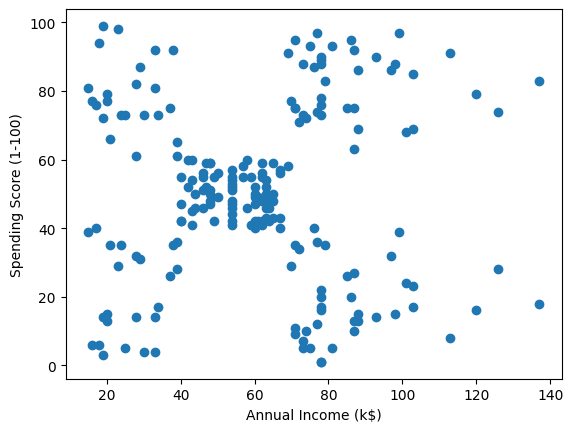

In [ ]:
#Visualize Data (Before Clustering)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

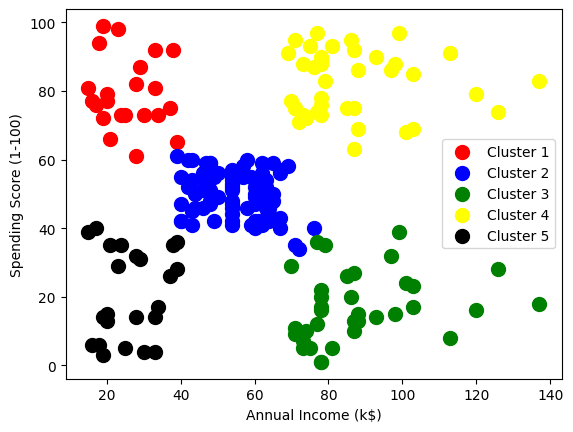

In [ ]:
#Visualize Data (After Clustering)
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_pred==1,0], x[y_pred==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_pred==2,0], x[y_pred==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_pred==3,0], x[y_pred==3,1], s=100, c='yellow', label='Cluster 4')
plt.scatter(x[y_pred==4,0], x[y_pred==4,1], s=100, c='black', label='Cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
temp = y_pred.tolist()
for i in range(len(temp)):
    if temp[i] == 0:
        temp[i] = 'Mid Income, Mid Spend'
    elif temp[i] == 1:
        temp[i] = 'High Income, High Spend'
    elif temp[i] == 2:
        temp[i] = 'Low Income, High Spend'
    elif temp[i] == 3:
        temp[i] = 'Mid Income, Low Spend'
    elif temp[i] == 4:
        temp[i] = 'Low Income, Low Spend'

In [ ]:
df['Cluster'] = temp
print(df)

     CustomerID   Genre  ...  Spending Score (1-100)                 Cluster
0             1    Male  ...                      39   Low Income, Low Spend
1             2    Male  ...                      81   Mid Income, Mid Spend
2             3  Female  ...                       6   Low Income, Low Spend
3             4  Female  ...                      77   Mid Income, Mid Spend
4             5  Female  ...                      40   Low Income, Low Spend
..          ...     ...  ...                     ...                     ...
195         196  Female  ...                      79   Mid Income, Low Spend
196         197  Female  ...                      28  Low Income, High Spend
197         198    Male  ...                      74   Mid Income, Low Spend
198         199    Male  ...                      18  Low Income, High Spend
199         200    Male  ...                      83   Mid Income, Low Spend

[200 rows x 6 columns]


##Hierarchical Clustering

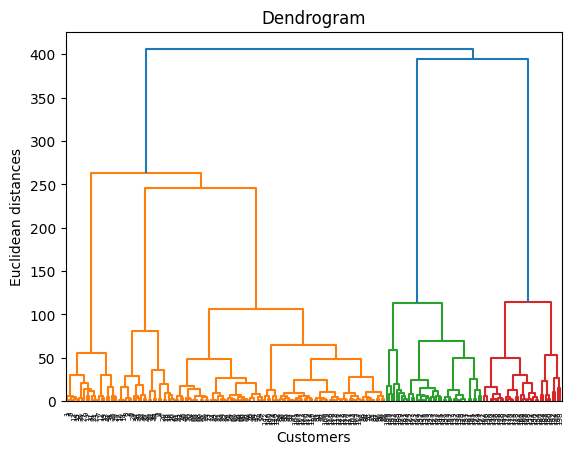

In [ ]:
#Plot Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Optimal Clusters K = 5

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(x)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [ ]:
#Evaluate Clusters
score = silhouette_score(x, y_hc)
print(score)

0.5529945955148897


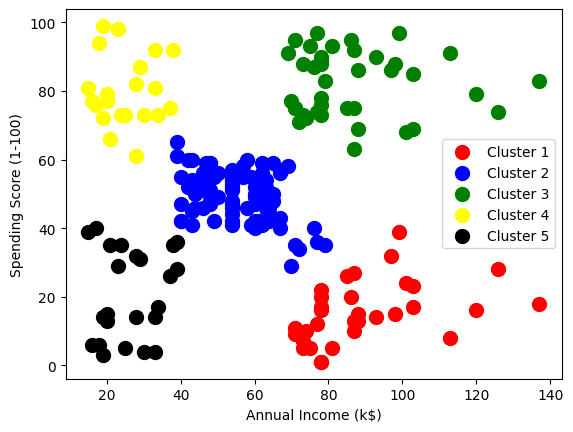

In [ ]:
#Visualize Data (After Clustering)
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='yellow', label='Cluster 4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], s=100, c='black', label='Cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()